In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
from sklearn.model_selection import cross_val_score

In [2]:
toys1 = pd.read_json('Toys_and_Games_5.json', lines=True)
toys = toys1.loc[np.random.choice(toys1.index, 50000, replace=False)].reindex()

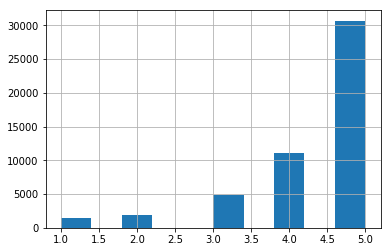

In [3]:
toys['overall'].hist()

In [4]:
toys['positive_rating'] = np.where(toys.overall >=4, 1, 0)

In [5]:
toys

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,positive_rating
84936,B00421AGOS,"[0, 0]",5,This is such a silly game for kids. My 7 and ...,"09 30, 2013",A2LOD3K7460UB,Toy Room,what a game,1380499200,1
161101,B00DR2VOJO,"[0, 0]",5,My 9 year old daughter fell in love with class...,"01 13, 2014",A2XDSQNJM8Y3VU,Casey Leavitt,A huge hit with my kids,1389571200,1
8964,B00005BHK7,"[4, 4]",5,I bought this for my niece's first birthday. S...,"12 10, 2003",A17UA7DPUQWVBK,Julie,Wonderful gift idea,1071014400,1
93966,B004MWN0G8,"[0, 0]",5,"My daughter loves it. it looks silly, so it ma...","08 8, 2013",A3CH3XIWNFRZ0,Responsible_Citizen_of_the _world.,nice toy,1375920000,1
35964,B000JSGLBK,"[0, 0]",5,This bird does not stop drinking.It's fun to w...,"03 15, 2013",A1W4G8B9BAWR1O,Lasha,The Famous Drinking Bird,1363305600,1
87428,B004560BPY,"[6, 8]",3,My daughter received this for her first birthd...,"10 24, 2012",A1632CW2ZVBRFS,jeniunderscore82,I Have A Love/Hate Relationship With This One...,1351036800,0
59522,B001UEWHG0,"[0, 0]",5,This is a great toy but definite not if you pa...,"12 29, 2009",A2EPUEVAK2HHVK,"E. StClair ""Shoppergirl""",Great as long as you dont pay retail for it.,1262044800,1
60894,B001W3SWEU,"[0, 0]",5,This was a wonderful starter Lego set for us -...,"09 30, 2011",A3QWC6OUH0JMI,LegoMama,Great Lego City vehicle,1317340800,1
139465,B009TCYJT8,"[3, 3]",4,This set just misses the five star mark so it ...,"01 15, 2013",AWBVQDOSDEAV0,JMD,Great set,1358208000,1
80544,B003KO7IAI,"[0, 0]",5,"love this..... it was in excitement condition,...","12 12, 2013",A1S69FATDV409Z,Richelle Thompson,perfect gift,1386806400,1


In [6]:
#df = toys[['reviewText', 'positive_rating']]

In [7]:
toys['positive_rating'] = (toys['positive_rating'] == 1)

In [8]:
toys['reviewText'] = toys.reviewText.str.replace(r'[^a-zA-Z\d\s:]', '')
toys['reviewText'] = toys['reviewText'].str.lower()

pos_words = toys.reviewText[toys.overall].str.cat(sep=' ').split()

neg_words = toys.reviewText[toys.overall == False].str.cat(sep=' ').split()

/home/brandoncsteed/.local/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [9]:
# Unique Words
print('negative:', len(np.unique(neg_words)), ' positive:', len(np.unique(pos_words)))

negative: 0  positive: 29


In [10]:
keywords = pd.Series(neg_words).value_counts().keys().ravel()

keywords

array([], dtype=float64)

In [11]:
diff = np.setdiff1d(
        ar1=pd.Series(pos_words).value_counts().keys().ravel(), 
                      ar2=pd.Series(neg_words).value_counts().keys().ravel()
                     )
diff

array(['a', 'additional', 'and', 'around', 'board', 'bought', 'carry',
       'doug', 'for', 'from', 'hope', 'increase', 'is', 'it', 'kids',
       'letter', 'magnetic', 'mellissa', 'nice', 'pieces', 'play', 'the',
       'them', 'thier', 'this', 'time', 'to', 'with', 'works'],
      dtype=object)

In [12]:
new = toys
keywords = diff

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    new[str(key)] = new.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

X = new[keywords]
y = new['positive_rating']

In [13]:
time1 = time.time()

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X, y)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X)

In [14]:
cross_val_score(bnb, X, y, cv=5)

array([0.83611639, 0.83661634, 0.8365    , 0.83668367, 0.83638364])

In [15]:
print('Naive Bayes runtime')
print('--- %s seconds ---' % (time.time() - time1))

Naive Bayes runtime
--- 0.2538595199584961 seconds ---


In [16]:
time2 = time.time()

from sklearn.svm import SVC
svc = SVC()

X = new[keywords]
y = new['positive_rating']

svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
cross_val_score(svc, X, y, cv=5)

array([0.83661634, 0.83661634, 0.8367    , 0.83668367, 0.83668367])

In [18]:
print('SVM runtime')
print('--- %s seconds ---' % (time.time() - time2))

SVM runtime
--- 732.4634745121002 seconds ---
